In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# 1.EDA

In [2]:
table_all = pd.read_csv("teste_indicium_precificacao.csv")

In [3]:
table_all

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Checando por id's duplicados

In [4]:
table_all.drop_duplicates("id")

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
table_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [6]:
table_all.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [7]:
table_all.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

O gráfico inicial analisa como os preços variam de acordo com o tipo de quarto. É evidente que o preço do quarto compartilhado nunca ultrapassa os 2000 dólares, enquanto tanto o quarto privativo quanto a casa inteira registram os valores mais elevados em determinados momentos.

Text(0.5, 1.0, 'Tipo de Quarto vs Preço')

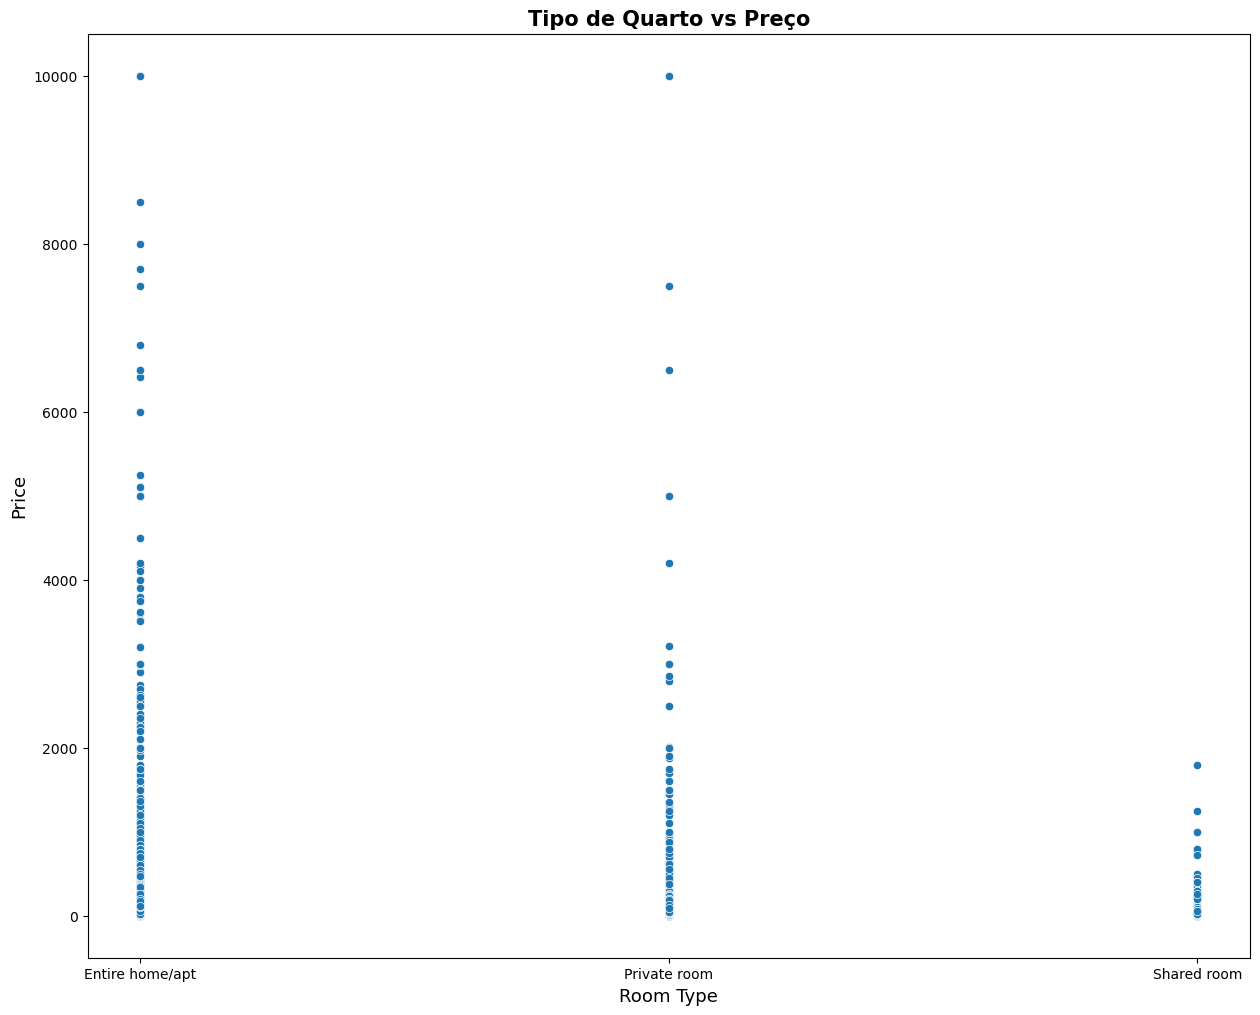

In [8]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=table_all)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Tipo de Quarto vs Preço",size=15, weight='bold')

O gráfico abaixo apresenta detalhes sobre preço e tipo de quarto com base no grupo de bairros. O preço mais alto de quarto privativo e casa inteira/apartamento é encontrado na mesma área, que é Manhattan. Além disso, Brooklyn tem preços muito altos tanto em quartos privativos quanto em casas inteiras/apartamentos. Por outro lado, o preço mais alto de quartos compartilhados está na área de Queens.

Text(0.5, 1.0, 'Room Type vs Price vs Group_Bairro')

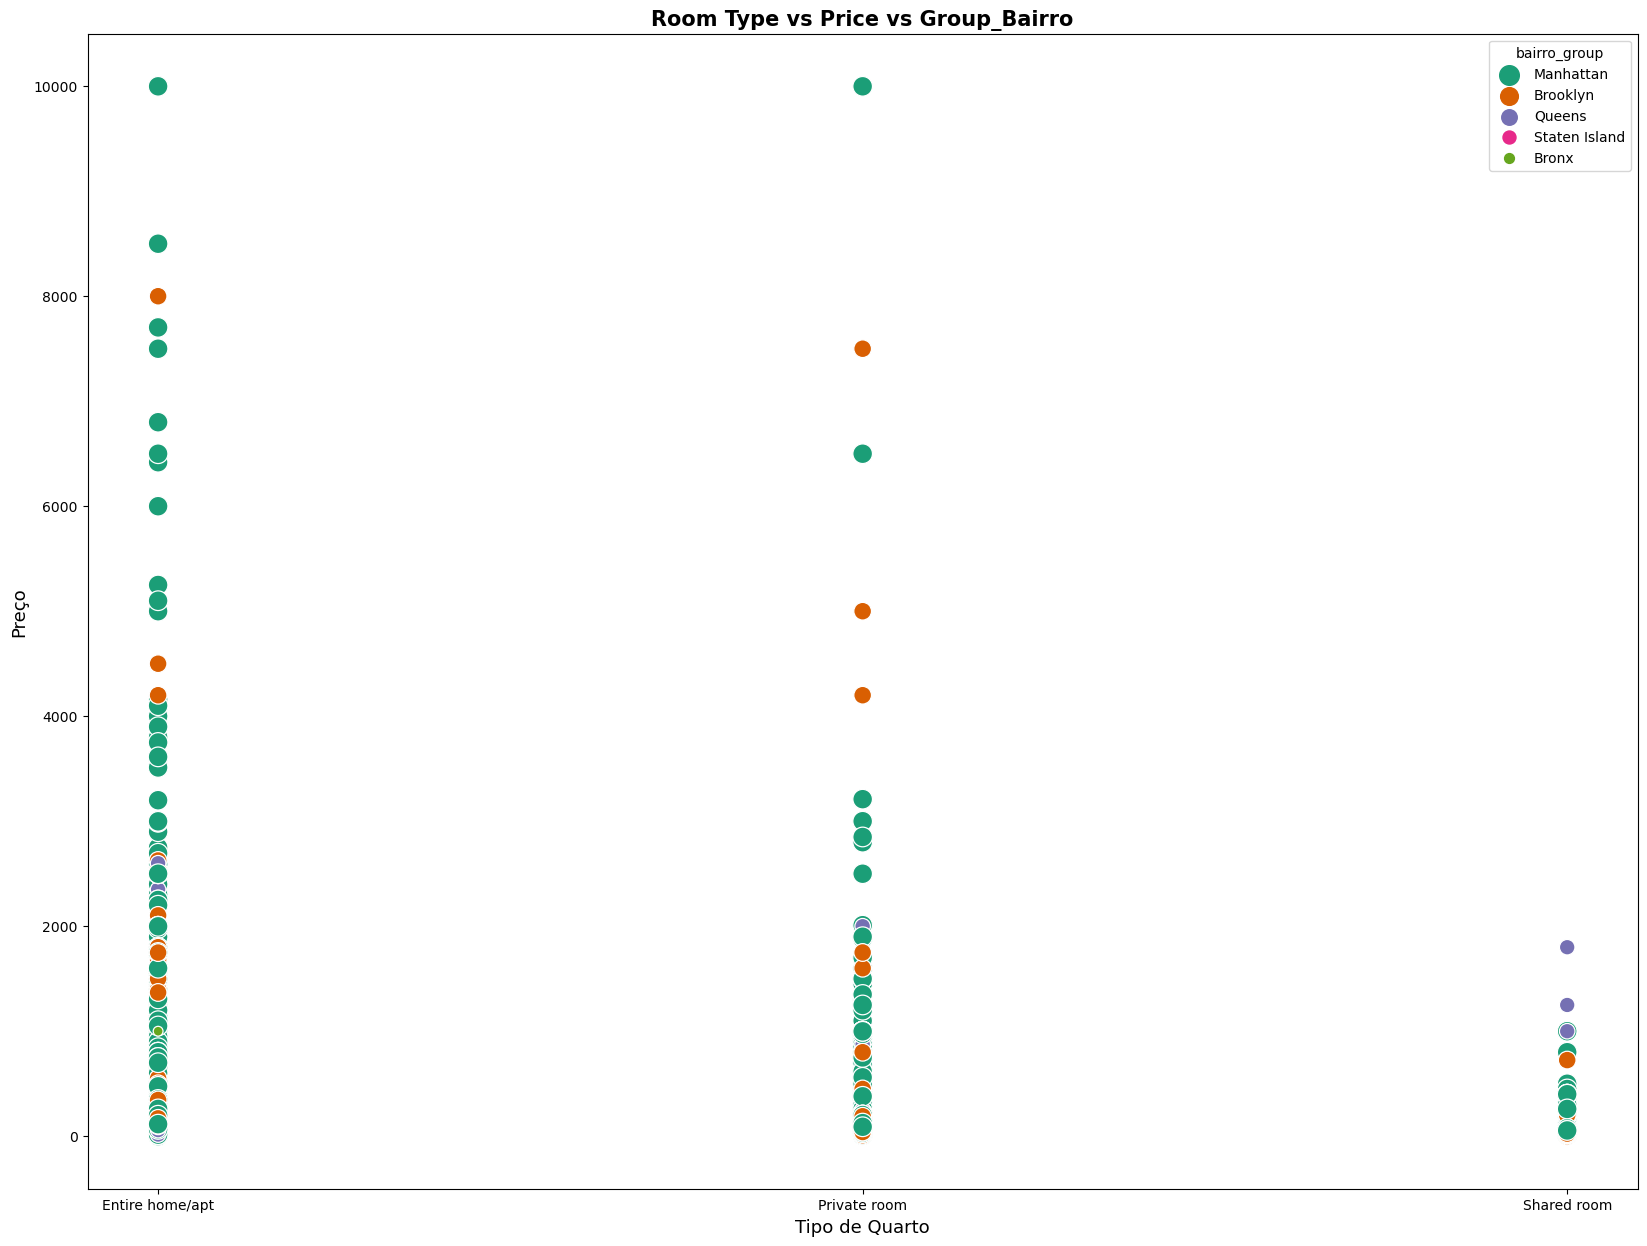

In [9]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="bairro_group", size="bairro_group",
            sizes=(50, 200), palette="Dark2", data=table_all)

plt.xlabel("Tipo de Quarto", size=13)
plt.ylabel("Preço", size=13)
plt.title("Room Type vs Price vs Group_Bairro",size=15, weight='bold')


Outro gráfico trata da relação entre preço e número de avaliações com base no grupo de bairros. Ele nos mostra que os preços mais baixos têm mais avaliações do que os preços mais altos, evidenciando uma correlação negativa entre preço e número de avaliações. Além disso, as áreas de Manhattan, Brooklyn e Queens têm mais avaliações do que as outras.

Text(0.5, 1.0, 'Preço vs Numero de Reviews vs Grupo de Bairro')

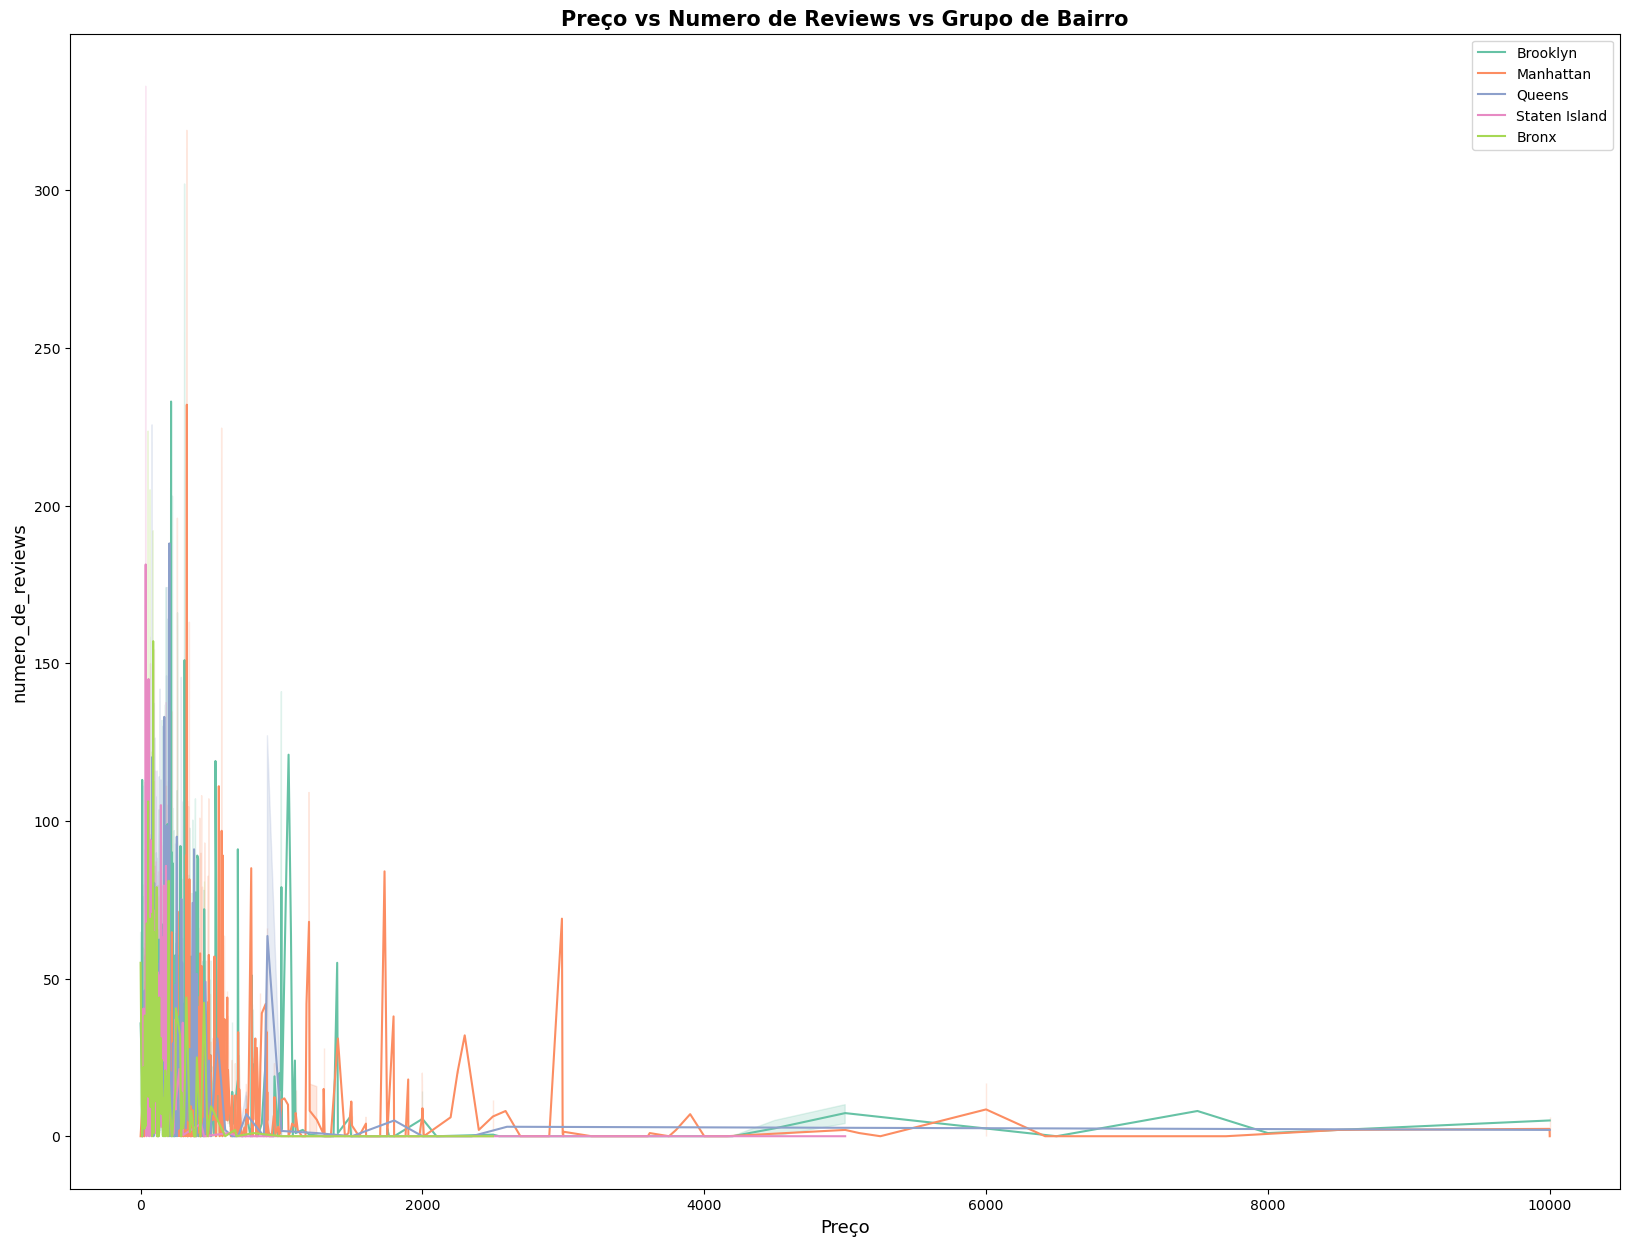

In [10]:
plt.figure(figsize=(20,15))
sns.set_palette("Set2")

sns.lineplot(x='price', y='numero_de_reviews', 
             data=table_all[table_all['bairro_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='numero_de_reviews', 
             data=table_all[table_all['bairro_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='numero_de_reviews', 
             data=table_all[table_all['bairro_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='numero_de_reviews', 
             data=table_all[table_all['bairro_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='numero_de_reviews', 
             data=table_all[table_all['bairro_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Preço", size=13)
plt.ylabel("numero_de_reviews", size=13)
plt.title("Preço vs Numero de Reviews vs Grupo de Bairro",size=15, weight='bold')

Antes de investigar a característica de preço, iremos mapear as variáveis categóricas utilizando o cat.code. Isso tornará a análise de dados mais acessível e compreensível.

In [11]:
table_all['bairro_group']= table_all['bairro_group'].astype("category").cat.codes
table_all['bairro'] = table_all['bairro'].astype("category").cat.codes
table_all['room_type'] = table_all['room_type'].astype("category").cat.codes
table_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  int8   
 5   bairro                         48894 non-null  int16  
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  int8   
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

C:\Users\Claud\AppData\Local\Temp\ipykernel_19200\3649519880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(table_all['price'], fit=norm)


Text(0.5, 1.0, 'Price Distribution Plot')

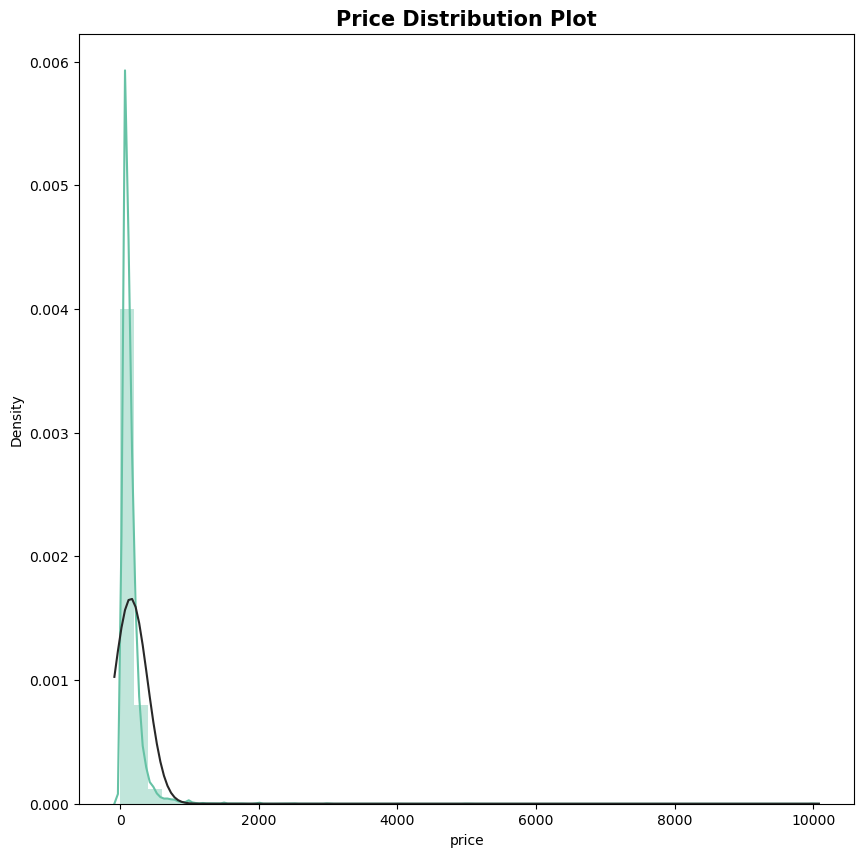

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(table_all['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

O gráfico de distribuição acima indica uma distribuição assimétrica positiva no preço, sugerindo uma tendência à direita. Para mitigar essa assimetria, optaremos pela transformação logarítmica. Essa abordagem facilitará a interpretação e aprimorará a análise estatística. Como precaução contra problemas de divisão por zero, optaremos pela transformação logarítmica acrescida de 1.

In [13]:
table_all['price_log'] = np.log(table_all.price+1)

In [14]:
nyc_model = table_all.drop(columns=['nome','id' ,'host_id','host_name', 
                                   'ultima_review','price'])
nyc_model.isnull().sum()

bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
minimo_noites                        0
numero_de_reviews                    0
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
price_log                            0
dtype: int64

# 3. Criação do modelo de Regressão de Lasso para a previsão de preços:

In [15]:
mean = nyc_model['reviews_por_mes'].mean()
nyc_model['reviews_por_mes'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
price_log                        0
dtype: int64

In [16]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [17]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

In [19]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(nyc_model_x, nyc_model_y)

In [20]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(nyc_model_x,nyc_model_y):
    X_train, X_test = nyc_model_x[train_index], nyc_model_x[test_index]
    y_train, y_test = nyc_model_y[train_index], nyc_model_y[test_index]

In [21]:
#Lasso Model
Lasso_model = Lasso(alpha = 0.001)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

Medidas de performace analisadas

In [22]:
print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

---------------Lasso-----------------------
--Phase-1--
MAE: 0.364508
RMSE: 0.507709
R2 0.460907


# 4. Sugestão de preço

In [62]:
jsonString = '''{"id": 2595,
 "nome": 1,
 "host_id": 2845,
 "host_name": 1,
 "bairro_group": 2,
 "bairro": 127,
 "latitude": 40.75362,
 "longitude": -73.98377,
 "room_type": 0,
 "price": 225,
 "minimo_noites": 1,
 "numero_de_reviews": 45,
 "ultima_review": 1,
 "reviews_por_mes": 0.38,
 "calculado_host_listings_count": 2,
 "disponibilidade_365": 355}
'''

jsonString

'{"id": 2595,\n "nome": 1,\n "host_id": 2845,\n "host_name": 1,\n "bairro_group": 2,\n "bairro": 127,\n "latitude": 40.75362,\n "longitude": -73.98377,\n "room_type": 0,\n "price": 225,\n "minimo_noites": 1,\n "numero_de_reviews": 45,\n "ultima_review": 1,\n "reviews_por_mes": 0.38,\n "calculado_host_listings_count": 2,\n "disponibilidade_365": 355}\n'

In [63]:
predict_df = pd.read_json(jsonString, orient ='index').T

In [64]:
predict_df.convert_dtypes()

predict_df = predict_df.convert_dtypes()

In [65]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1 non-null      Int64  
 1   nome                           1 non-null      Int64  
 2   host_id                        1 non-null      Int64  
 3   host_name                      1 non-null      Int64  
 4   bairro_group                   1 non-null      Int64  
 5   bairro                         1 non-null      Int64  
 6   latitude                       1 non-null      Float64
 7   longitude                      1 non-null      Float64
 8   room_type                      1 non-null      Int64  
 9   price                          1 non-null      Int64  
 10  minimo_noites                  1 non-null      Int64  
 11  numero_de_reviews              1 non-null      Int64  
 12  ultima_review                  1 non-null      Int64  

In [66]:
nyc_model.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365', 'price_log'],
      dtype='object')

In [67]:
predict_df['price']= np.log(predict_df.price)

In [68]:
predict_df = predict_df[['bairro_group', 'bairro','latitude', 'longitude', 'room_type',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365', 'price']]

In [69]:
predict_df_x = predict_df.iloc[:,:-1]

In [70]:
predict_df_x = scaler.transform(predict_df_x)

In [71]:
pred_Lasso = Lasso_model.predict(predict_df_x) 

In [72]:
pred_Lasso

array([5.43559086])

In [73]:
np.exp(pred_Lasso)

array([229.42836879])

Preço sugerido: U$229.43